## **Survival of passengers on the Titanic**
### *Katona Angela-Bernadett - Inginerie Software*


Setul de date ales este "**Titanic**", un set ce contine informatii despre soarta pasagerilor celebrului vas Titanic. Acesta contine 887 de observatii, avand 8 variabile. Dintre acestea am ales sa lucrez numai cu 4 variabile pe care le-am considerat fiind cele mai semnificative pentru problemele ce as vrea sa le studiez:


*   **Pclass** -  1, 2 sau 3 in functie de clasa sociala (calitativ ordinal)
*   **Sex** - male, female (calitativ binar)

*   **Age** - varsta pasagerilor (cantitativ discret)
*   **Survived** -  1 daca au supravietuit, 0 daca nu au supravietuit (calitativ binar)






In [6]:
# pachete necesare
library("data.table") 
library("ggplot2")
library("readr")
#library("dplyr")
library("tidyr")
library("forcats")
library("devtools")
library("tidyverse")

In [7]:
# incarcarea setului de date
titanic <- fread("./sample_data/titanic.csv", select = c("Pclass", "Sex", "Age", "Survived"))
head(titanic)

Pclass,Sex,Age,Survived
<int>,<chr>,<dbl>,<int>
3,male,22,0
1,female,38,1
3,female,26,1
1,female,35,1
3,male,35,0
3,male,27,0


Problemele ce vor fi discutate in continuare sunt:


1.   Analizarea ratei de supravietuire in functie de diferiti factori
2.   Analizarea unor ipoteze statistice
3.   Crearea unui model de regresie logistica



### 1. Analizarea ratei de supravietuire in functie de diferiti factori

Folosind un barplot, putem vizualiza cate persoane au supravietuit comparativ cu cele care nu au supravietuit. Se poate observa usor ca numarul persoanelor decesate este mai mare.

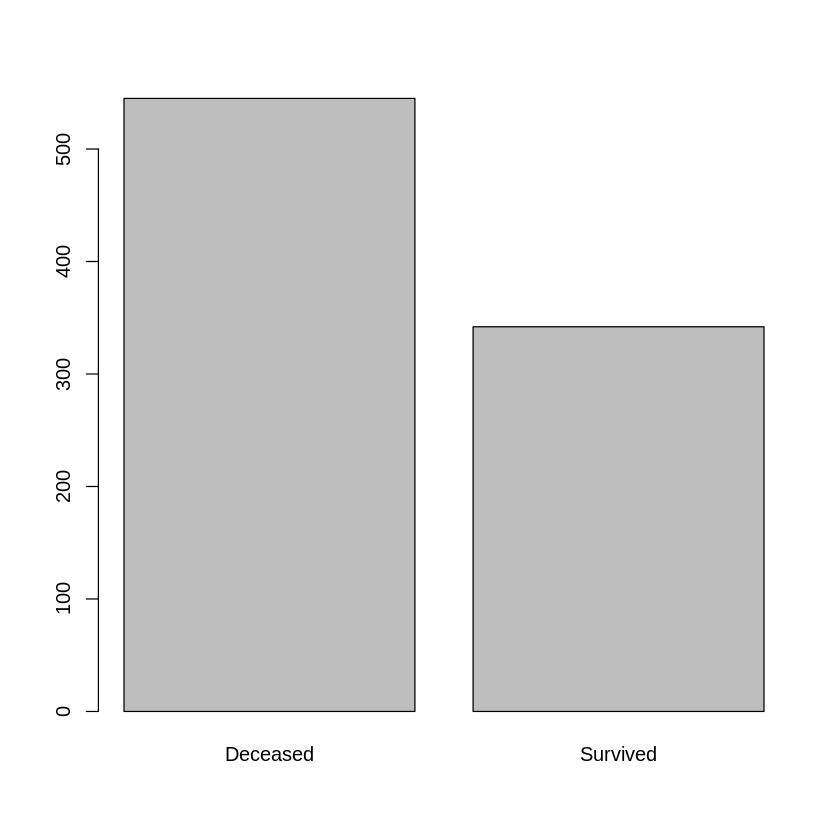

In [8]:
barplot(table(titanic$Survived), names=c("Deceased","Survived"))

In continuare, vom analiza rata de supravietuire in functie de sex, cat si in functie de varsta, folosind tabele de frecventa.

In [9]:
deathGenderTable = xtabs(~Survived+Sex, data = titanic)
addmargins(deathGenderTable)

,female,male,Sum
0,81,464,545
1,233,109,342
Sum,314,573,887


In [10]:
prop.table(deathGenderTable, 1)

        Sex
Survived    female      male
       0 0.1486239 0.8513761
       1 0.6812865 0.3187135

Putem observa faptul ca 85% din persoanele decedate au fost barbati si 68% din persoanele care au supravietuit sunt femei.

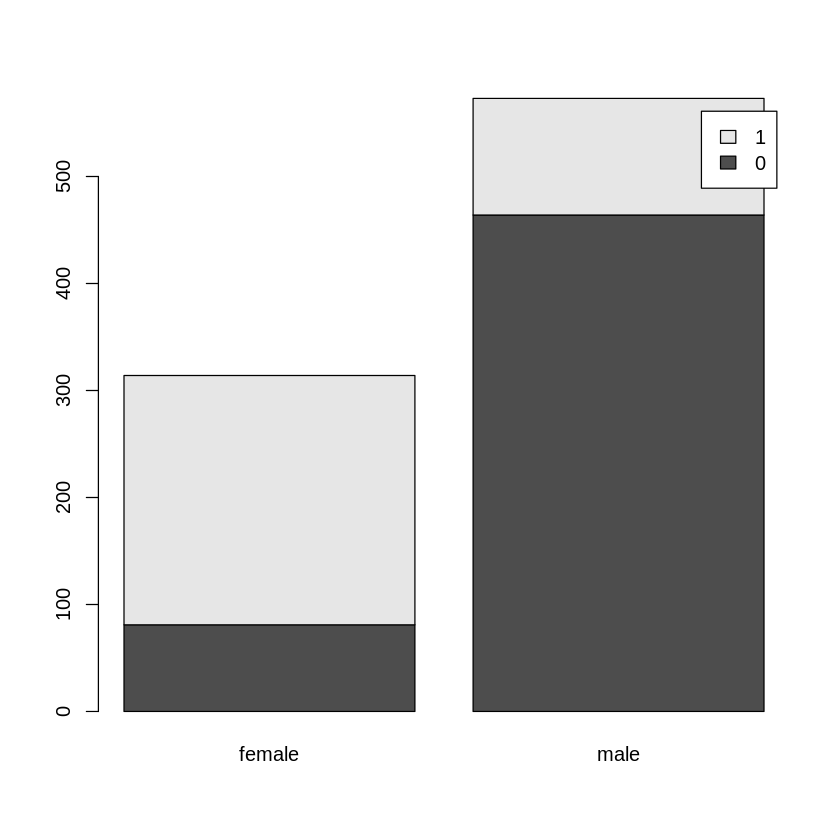

In [11]:
barplot(deathGenderTable, legend=TRUE)

In [12]:
titanic_2 = titanic
titanic_2$Age <- ifelse(titanic_2$Age < 18, "Child", "Adult")
head(titanic_2,10)

Pclass,Sex,Age,Survived
<int>,<chr>,<chr>,<int>
3,male,Adult,0
1,female,Adult,1
3,female,Adult,1
1,female,Adult,1
3,male,Adult,0
3,male,Adult,0
1,male,Adult,0
3,male,Child,0
3,female,Adult,1


In [13]:
deathAgeTable = xtabs(~Age+Survived, data = titanic_2)
addmargins(deathAgeTable)

,0,1,Sum
Adult,480,277,757
Child,65,65,130
Sum,545,342,887


In [14]:
prop.table(deathAgeTable, 1)

       Survived
Age             0         1
  Adult 0.6340819 0.3659181
  Child 0.5000000 0.5000000

Putem observa ca jumatate din copii au decedat si jumatate au supravietuit.

Putem analiza rata de supravietuire in functie de varsta mai in detaliu prin a vizualiza indicatorii statistici de pozitie. Asadar varsta medie a unui supravietuitor este de 28 de ani, dar de asemenea varsta medie a unei persoane decedate este de 30 de ani.

In [15]:
survivorAge = titanic$Age[titanic$Survived==1]
summary(survivorAge)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.42   19.00   28.00   28.41   36.75   80.00 

In [16]:
deceasedAge = titanic$Age[titanic$Survived==0]
summary(deceasedAge)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   21.00   28.00   30.14   39.00   74.00 

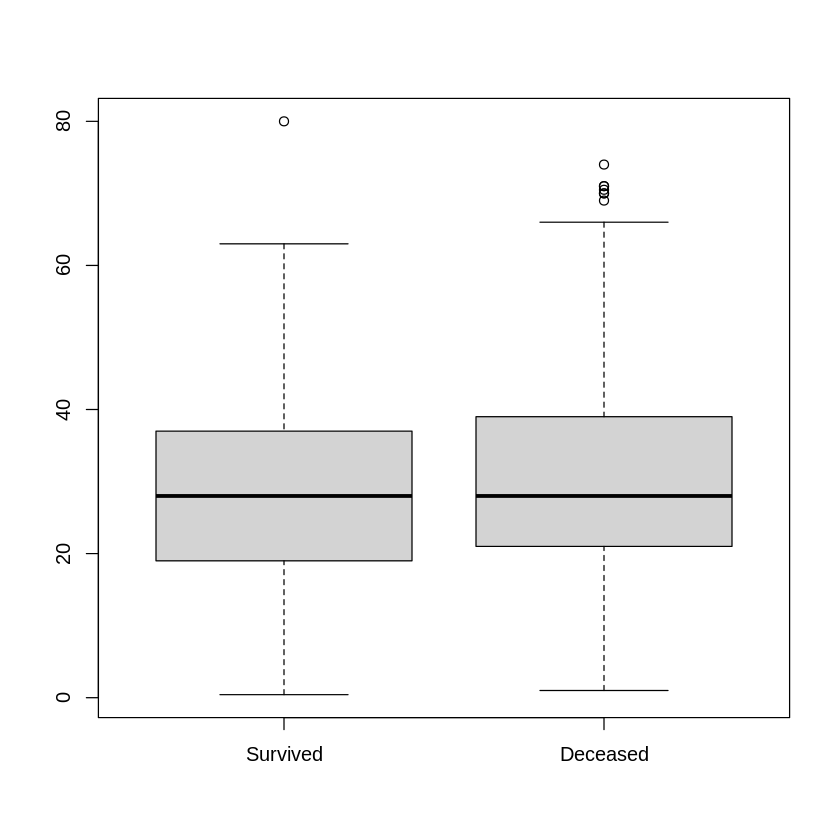

In [17]:
boxplot(survivorAge, deceasedAge,names=c("Survived","Deceased"))

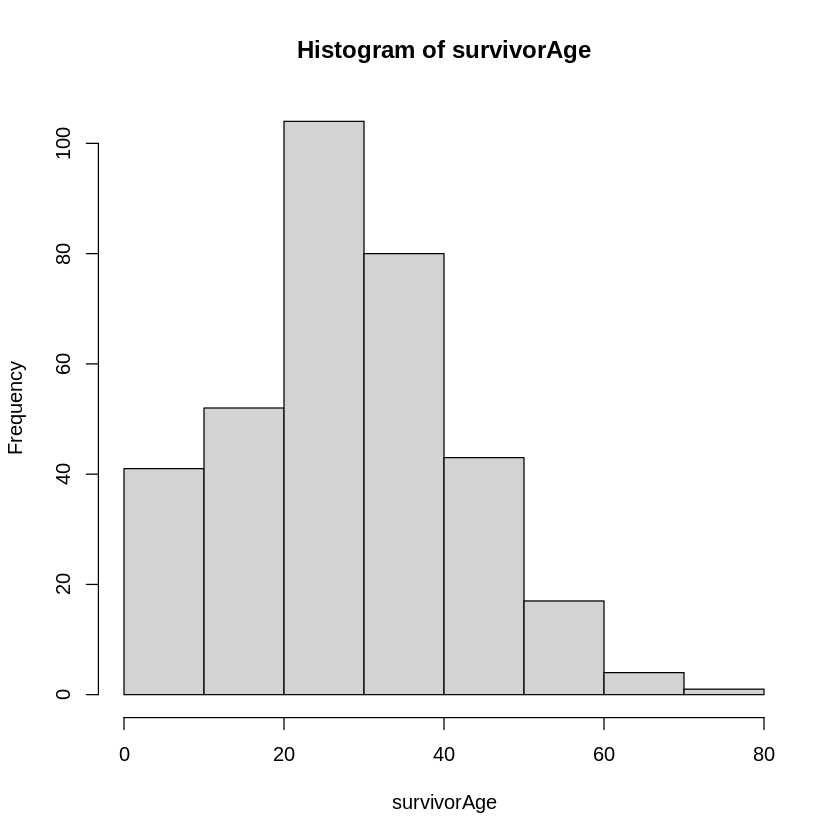

In [18]:
hist(survivorAge)

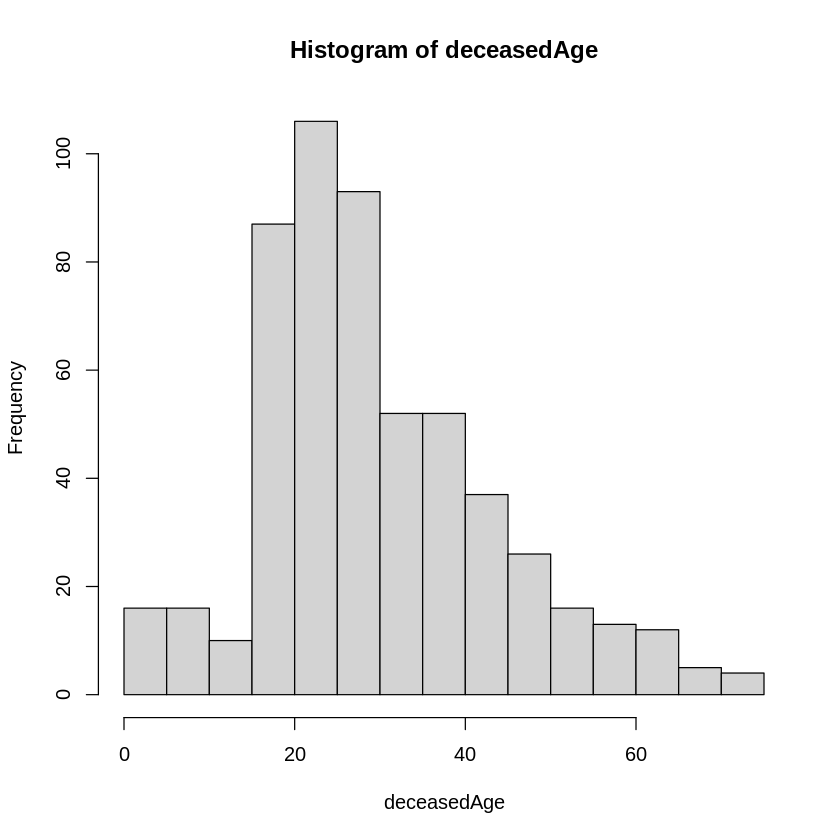

In [19]:
hist(deceasedAge)

Pentru a compara rata de supravietuire si diferenta acestora in functie de clase, am folosit un barplot. Putem observa ca 39% din persoanele care au supravietuit au fost la clasa 1, iar aproape 70% din persoanele care au decedat au fost din clasa inferioara.

        Pclass
Survived         1         2         3
       0 0.1467890 0.1779817 0.6752294
       1 0.3976608 0.2543860 0.3479532

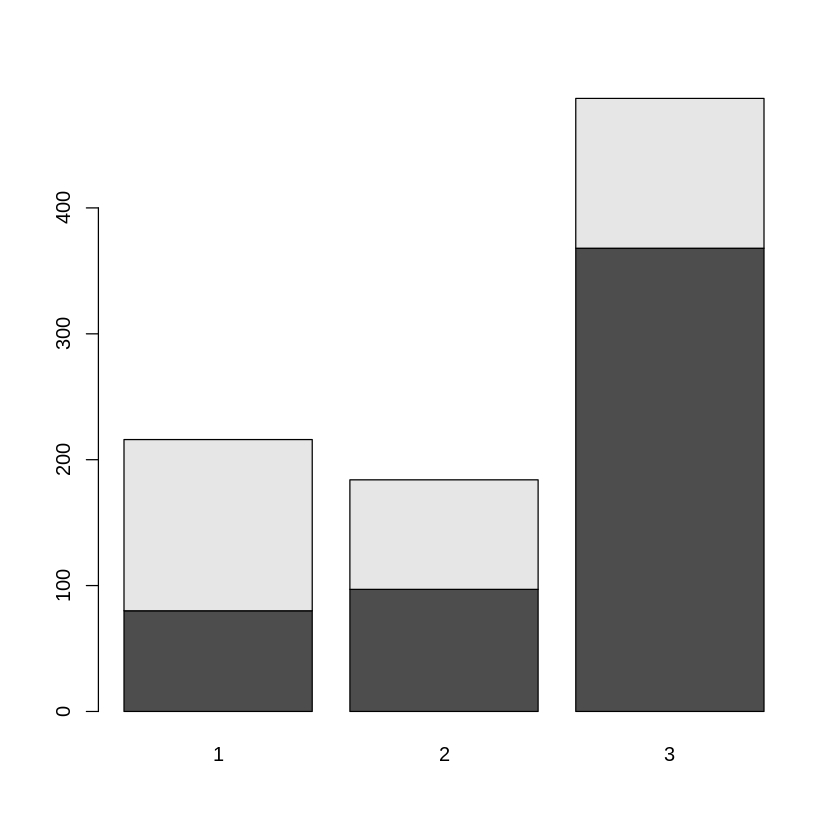

In [20]:
deathClassTable = xtabs(~Survived+Pclass, data = titanic)
prop.table(deathClassTable, 1)
barplot(deathClassTable)

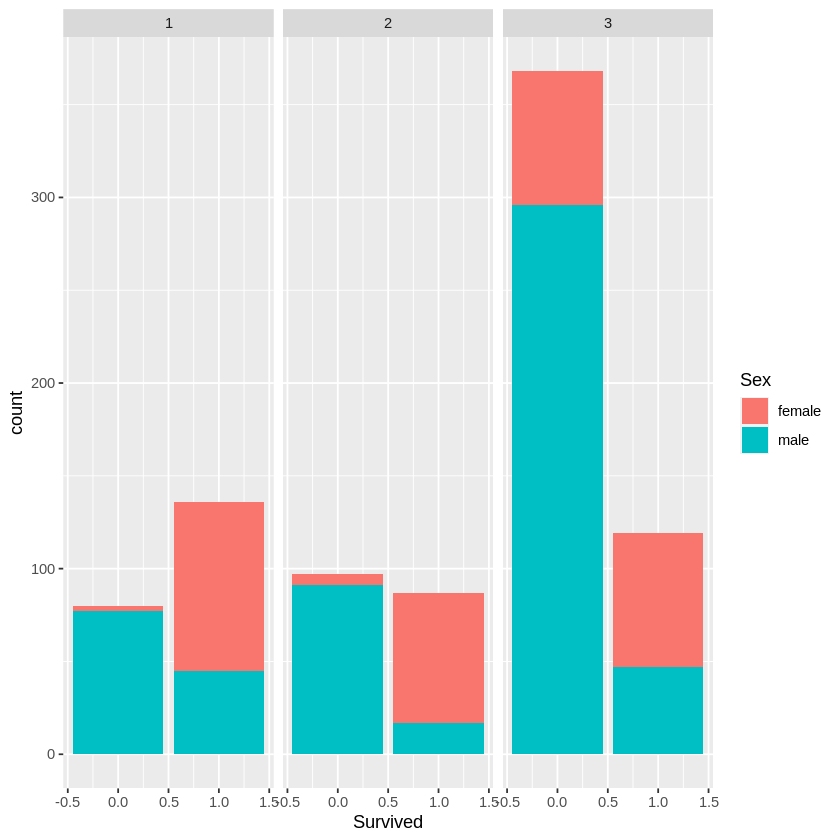

In [21]:
titanic %>% 
  ggplot(aes(x = Survived, fill = Sex)) +
  geom_bar() +
  facet_wrap(~ Pclass) 

### 2. Analizarea unor ipoteze statistice

> Dorim sa verificam ipoteza ca varsta persoanelor decedate este mai mare decat a persoanelor care au supravietuit, la nivelul de semnificatie 0.05.



In [22]:
#H0:deceasedAge = survivorAge, Ha: deceasedAge > survivorAge
t.test(survivorAge, deceasedAge, mu = 0, alt = "less", paired = F)


	Welch Two Sample t-test

data:  survivorAge and deceasedAge
t = -1.763, df = 704.1, p-value = 0.03917
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.1137992
sample estimates:
mean of x mean of y 
 28.40839  30.13853 


Valoarea lui p este mai mica decat 0.05, deci respingem H0 si acceptam Ha. Asadar, ipoza noastra initiala este corecta.

> Dorim sa verificam ipoteza ca numarul de femei care au supravietuit este mai mare decat cel al barbatilor.

In [23]:
#H0:femei = barbati, Ha: femei > barbati
t.test(titanic$Survived~titanic$Sex, mu=0, alt="t", paired=F)  


	Welch Two Sample t-test

data:  titanic$Survived by titanic$Sex
t = 18.592, df = 587.06, p-value < 2.2e-16
alternative hypothesis: true difference in means between group female and group male is not equal to 0
95 percent confidence interval:
 0.4935209 0.6101018
sample estimates:
mean in group female   mean in group male 
           0.7420382            0.1902269 


### 3.   Crearea unui model de regresie logistica 

In [37]:
sample = sample(1:nrow(titanic), floor(.75*nrow(titanic)), replace = F)

train = titanic[sample,]
test = titanic[-sample,]


model=glm(Survived~Age+Sex+Pclass, family = binomial(logit), data = train)
summary(model)

newdata=data.frame(Age=test$Age[1],Sex=test$Sex[1],Pclass=test$Pclass[1])
print("Survived based on dataset:")
test$Survived[1]
print("Survival prediction:")
predict(model,newdata,type="response")


newdata=data.frame(Age=test$Age[5],Sex=test$Sex[5],Pclass=test$Pclass[5])
print("Survived based on dataset:")
test$Survived[5]
print("Survival prediction:")
predict(model,newdata,type="response")

newdata=data.frame(Age=22,Sex="female",Pclass=2)
print("Would I have survived:")
predict(model,newdata,type="response")


Call:
glm(formula = Survived ~ Age + Sex + Pclass, family = binomial(logit), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0012  -0.6509  -0.3867   0.6263   2.5356  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.273869   0.553542   9.527  < 2e-16 ***
Age         -0.041179   0.008509  -4.839  1.3e-06 ***
Sexmale     -2.563008   0.218680 -11.720  < 2e-16 ***
Pclass      -1.357539   0.148575  -9.137  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 878.46  on 664  degrees of freedom
Residual deviance: 589.49  on 661  degrees of freedom
AIC: 597.49

Number of Fisher Scoring iterations: 5


[1] "Survived based on dataset:"


[1] 0

[1] "Survival prediction:"


1 
0.09383413

[1] "Survived based on dataset:"


[1] 0

[1] "Survival prediction:"


1 
0.1010751

[1] "Would I have survived:"


1 
0.8392763